In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/Zomato data .csv')
print(dataset)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

**Converting the data type of the column rate**

In [3]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)
dataset['rate']=dataset['rate'].apply(handleRate)
print(dataset.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


**Types of resturants**

Q1) What type of retaurants do the majority of customers order from?

---


Answer: **Dining**

Text(0.5, 0, 'type of resturants')

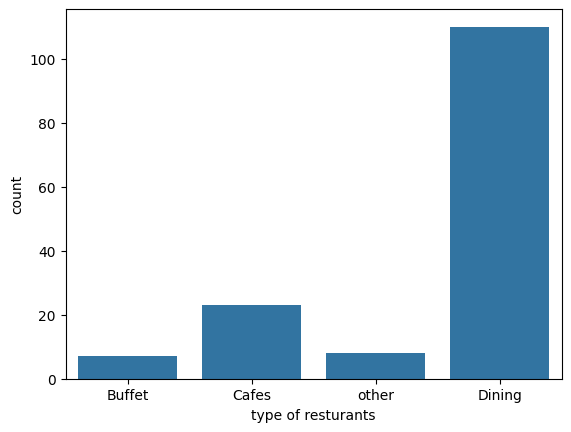

In [4]:
sns.countplot(x=dataset['listed_in(type)'])
plt.xlabel('type of resturants')

Q2) How many votes has each type of restaurant recieved from customers?

---


Answer:
Dining:20000,
Cafes:around 6000,
Buffet:around 3000,
Other: around 8000


Text(0, 0.5, 'votes')

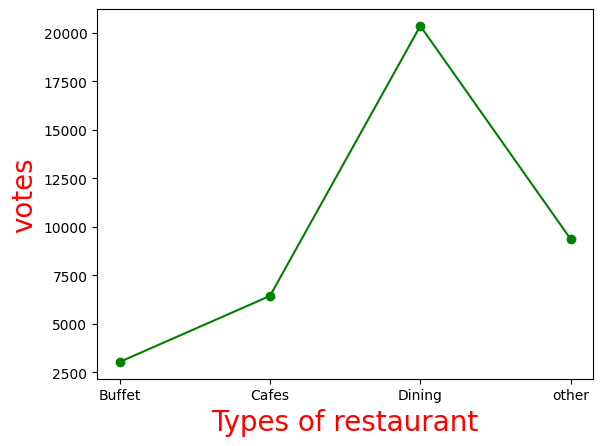

In [5]:
grouped_data=dataset.groupby('listed_in(type)')['votes'].sum()
results=pd.DataFrame({'votes':grouped_data})
plt.plot(results,c='Green',marker='o')
plt.xlabel('Types of restaurant',c='red',size=20)
plt.ylabel('votes',c='red',size=20)

Q3) What are the ratings that the majority of restaurants have received?

---


Answer: Majority of the ratings are between 3.5 to 4.

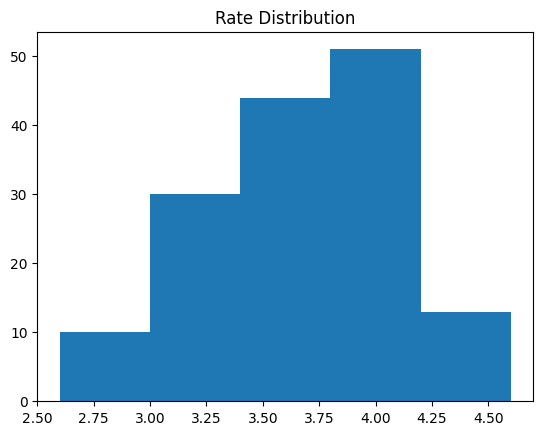

In [6]:
plt.hist(dataset['rate'],bins=5)
plt.title('Rate Distribution')
plt.show()

Q4) Zomato has observed that most couples order most of their food online.What is their average spending on each order?

---


Answer: Rs 300

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

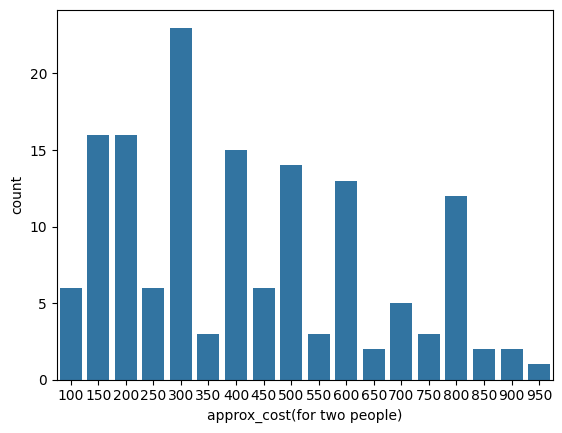

In [7]:
couple_data=dataset['approx_cost(for two people)']
sns.countplot(x=couple_data)

Q5)Which mode(online or offline) has received the maximum rating?

---


Answer:Online Mode received maximum rating.

<Axes: xlabel='online_order', ylabel='rate'>

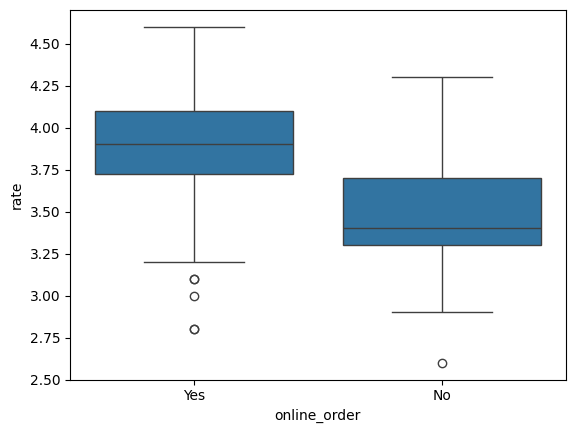

In [8]:
plt.plot(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataset)

Q6)Which type of restaurant received more offline orders,so that Zomato can provide customers with good offers?

---


Answer:Dining

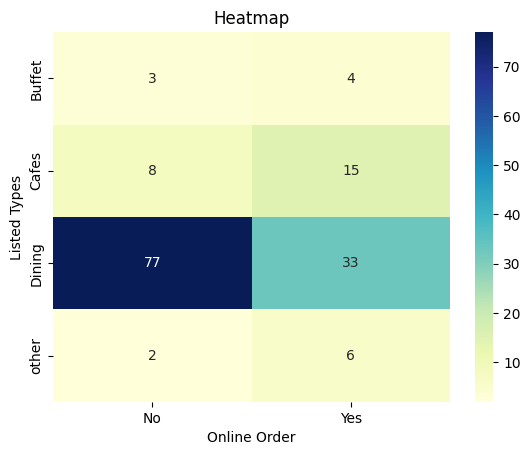

In [9]:
pivot_table=dataset.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed Types')
plt.show()

**Conclusion**

---
Dining restaurants primarily receive offline orders whereas cafes primarily receive online orders.This suggests that clients prefer ordering in person at
restaurants but perfer ordering online at cafes.